# Assignment 1 Data preprocessing
## Boston Housing Dataset - Exploratory Data Analysis (EDA)

Please add the name, first name, immatriculation number and study program below. Each member of the group has to be added:
- *Atighetchi: , Daniel: , 3664061: , B.Sc. Informatik*
- *Saravanan: , Kaushik: , 3758197: , M.Sc. Electrical Engineering*
- *Aboulgadayel: ,  Omar: , 3610497: , M.Sc. Informatik*


In this notebook, you will explore the Boston Housing dataset, which contains information about housing conditions in suburbs of Boston. The objective of this exercise is to perform exploratory data analysis (EDA) and apply Principal Component Analysis (PCA) to understand the underlying structure of the data.

In [1]:
# install following libraries using pip in terminal or pip! in this notebook
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Load dataset
column_names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']
df = pd.read_csv('./data/housing.csv', header=None, delimiter=r"\s+", names=column_names)
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


The following describes the dataset columns:

- CRIM - per capita crime rate by town
- ZN - proportion of residential land zoned for lots over 25,000 sq.ft.
- INDUS - proportion of non-retail business acres per town.
- CHAS - Charles River dummy variable (1 if tract bounds river; 0 otherwise)
- NOX - nitric oxides concentration (parts per 10 million)
- RM - average number of rooms per dwelling
- AGE - proportion of owner-occupied units built prior to 1940
- DIS - weighted distances to five Boston employment centres
- RAD - index of accessibility to radial highways
- TAX - full-value property-tax rate per $10,000
- PTRATIO - pupil-teacher ratio by town
- B - 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
- LSTAT - % lower status of the population
- MEDV - Median value of owner-occupied homes in $1000's

In [3]:
target = df['MEDV']

# Task 1: Understanding dataset

## 1.1: Load dataset
we made some modification on the original housing.csv. Please load the modified_housing.csv.


In [4]:
# Your solution goes here



# Load the modified CSV file
df = pd.read_csv('./data/modified_housing.csv')


# Preview the loaded data
print(df.head())


        CRIM     ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0  "0.02731"  "0.0"   7.07     0  0.469  6.421  78.9  4.9671    2  242.0   
1  "0.02729"  "0.0"   7.07     0  0.469  7.185  61.1  4.9671    2  242.0   
2  "0.03237"  "0.0"   2.18     0  0.458  6.998  45.8  6.0622    3  222.0   
3  "0.06905"  "0.0"   2.18     0  0.458  7.147  54.2  6.0622    3  222.0   
4  "0.02985"  "0.0"   2.18     0  0.458  6.430  58.7  6.0622    3  222.0   

   PTRATIO       B  LSTAT  MEDV  
0     17.8  396.90   9.14  21.6  
1     17.8  392.83   4.03  34.7  
2     18.7  394.63   2.94  33.4  
3     18.7  396.90   5.33  36.2  
4     18.7  394.12   5.21  28.7  


## 1.2: Analysis
How many samples and features (excluding the target) are in the dataset?

In [5]:
# Your solution goes here

# Number of samples (rows)
num_samples = df.shape[0]

# Number of total columns
total_columns = df.shape[1]

# The last column is the target (MEDV), so exclude it
num_features = total_columns - 1

print(f"Number of samples: {num_samples}")
print(f"Number of features (excluding target): {num_features}")



Number of samples: 505
Number of features (excluding target): 13


## 1.3: Check and fix data types
When working with real-world datasets, it's common to encounter issues where columns don't have the correct data type. In our modified_housing.csv, some columns might not have the correct data type. For example, numeric values may be accidentally stored as strings, which can interfere with computations, visualizations, or modeling.

Use your own code to explore the following questions:
1. Which columns appear to have incorrect data types?
2. How would you convert them to the correct type?
3. What could go wrong later in the workflow if data types are not corrected now?

In [6]:
# Your solution goes here

#Read the modified housing file
df = pd.read_csv('./data/modified_housing.csv')


# Check the current data types of all columns
print("Current data types of columns:")
print(df.dtypes)

# Identify object columns that may contain incorrect data types
object_cols = df.select_dtypes(include='object').columns
print("\nObject columns to investigate:")
print(object_cols)

# Look at first few entries of object columns to see what might be wrong
for col in object_cols:
    print(f"\n{col} sample values:")
    print(df[col].head(5))

# Clean up the object columns by removing quotes and extra spaces
for col in object_cols:

    df[col] = df[col].str.replace(r'"', '', regex=True)  # Remove double quotes
    df[col] = df[col].str.replace(r"'", '', regex=True)  # Remove single quotes
    df[col] = df[col].str.replace(r'\s+', '', regex=True)  # Remove any extra spaces

# Convert object columns to numeric
for col in object_cols:
    df[col] = pd.to_numeric(df[col], errors='coerce')

# Verify that the conversion worked by checking data types again
print("\nData types after conversion:")
print(df.dtypes)

print("If data types are not corrected now, they will not be correctly recognized or used later. This results in incorrect and insufficient analysis.")


df.to_csv('./data/cleaned_housing_modified.csv', index=False)


Current data types of columns:
CRIM        object
ZN          object
INDUS      float64
CHAS         int64
NOX        float64
RM         float64
AGE        float64
DIS        float64
RAD          int64
TAX        float64
PTRATIO    float64
B          float64
LSTAT      float64
MEDV       float64
dtype: object

Object columns to investigate:
Index(['CRIM', 'ZN'], dtype='object')

CRIM sample values:
0    "0.02731"
1    "0.02729"
2    "0.03237"
3    "0.06905"
4    "0.02985"
Name: CRIM, dtype: object

ZN sample values:
0    "0.0"
1    "0.0"
2    "0.0"
3    "0.0"
4    "0.0"
Name: ZN, dtype: object

Data types after conversion:
CRIM       float64
ZN         float64
INDUS      float64
CHAS         int64
NOX        float64
RM         float64
AGE        float64
DIS        float64
RAD          int64
TAX        float64
PTRATIO    float64
B          float64
LSTAT      float64
MEDV       float64
dtype: object
If data types are not corrected now, they will not be correctly recognized or used later.

## 1.4: Handle missing values
In the real world, datasets are rarely perfect. Some features in our dataset contain missing values, which must be addressed before building predictive models.

Use your own code to explore the following questions:
1. Which features have missing values?
2. How many values are missing in each?
3. Should you drop the missing values or fill them?
4. Would the mean, median, or a constant be appropriate?
5. How might missing values affect your results?

In [7]:
# Your solution goes here

# Read the cleaned housing modified file
df = pd.read_csv('./data/cleaned_housing_modified.csv')


# Look for missing values in each feature (column)
print("Missing values in each column:")
print(df.isnull().sum())

# Decide whether to drop or fill missing values
# We need to check the number of missing values and decide based on that:
# If a feature has a lot of missing values, it should be dropped
# If a feature has only a few missing values, it should be filled.

# Look at percentage of missing values to make the decision:
missing_percentage = df.isnull().mean() * 100
print("\nPercentage of missing values in each column:")
print(missing_percentage)

print("Since the percentage of missing values is low (<5% for all columns with missing values), we should fill with the mean!")

# Fill missing values with the mean
df_filled = df.fillna(df.mean())


# Dropping or filling missing values can have significant effects on model performance.
# If we drop rows, we lose data, and if we fill missing values with the mean, we risk biasing the data.
# Filling with the mean is a good approach when the dataset is large and the missing values are random!

# Check if any missing values remain after filling
print("\nMissing values after filling:")
print(df_filled.isna().sum())

# Save the filled DataFrame (with no missing values) to a new file
df_filled.to_csv('./data/no_missing_cleaned_housing.csv', index=False)

print("\nThe cleaned dataset (with no missing entries) has been saved as 'no_missing_cleaned_housing.csv'.")









Missing values in each column:
CRIM        0
ZN          0
INDUS       0
CHAS        0
NOX         0
RM         25
AGE        25
DIS         0
RAD         0
TAX        25
PTRATIO     0
B           0
LSTAT       0
MEDV        0
dtype: int64

Percentage of missing values in each column:
CRIM       0.000000
ZN         0.000000
INDUS      0.000000
CHAS       0.000000
NOX        0.000000
RM         4.950495
AGE        4.950495
DIS        0.000000
RAD        0.000000
TAX        4.950495
PTRATIO    0.000000
B          0.000000
LSTAT      0.000000
MEDV       0.000000
dtype: float64
Since the percentage of missing values is low (<5% for all columns with missing values), we should fill with the mean!

Missing values after filling:
CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

The cleaned dataset (with no missing entries) has been saved as 'no_missi

# Task 2: Handle outliers

Real-world datasets often contain unusual or extreme values — known as outliers. Before applying any modeling techniques, it's important to explore identify potential anomalies and address them.



## 2.1: Visualize the distribution for each feature

In this task, please find a way to visualize the distribution of values in each feature and explore the following questions:

1. Which features show significant outliers?
2. Are the outliers far from the main range of the data?

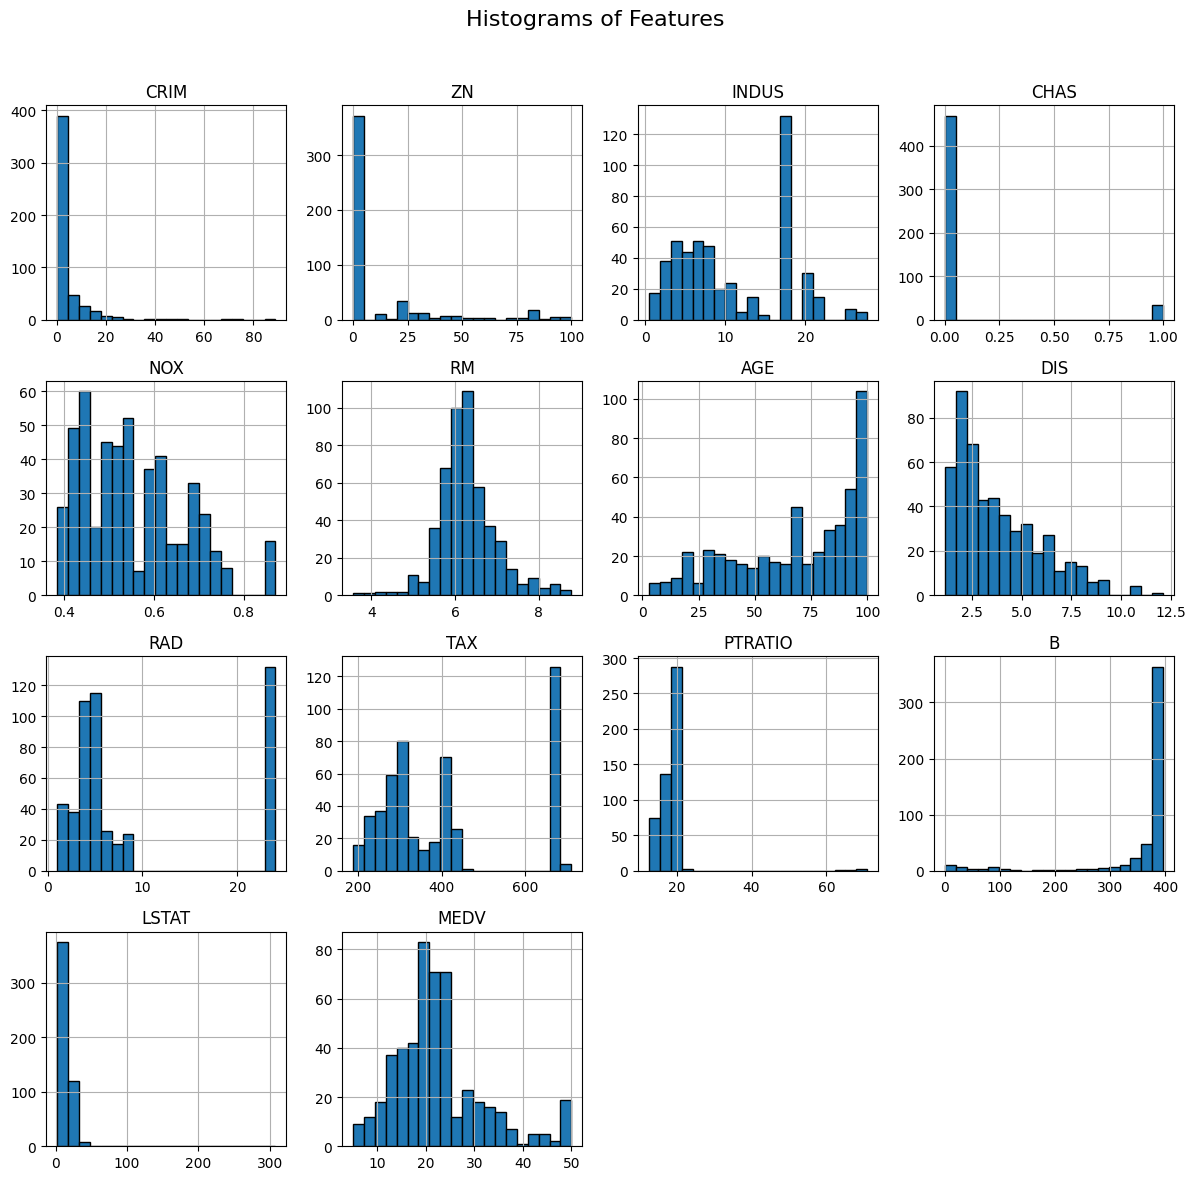

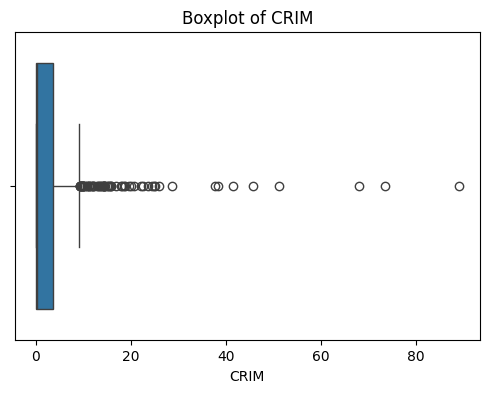

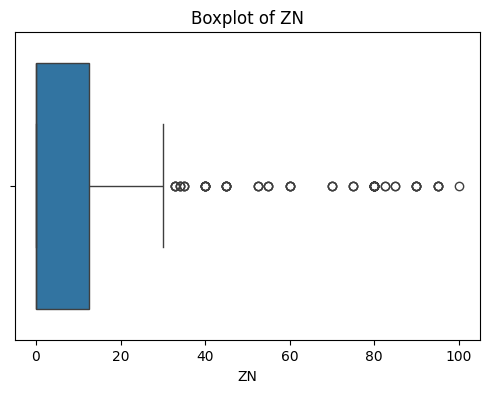

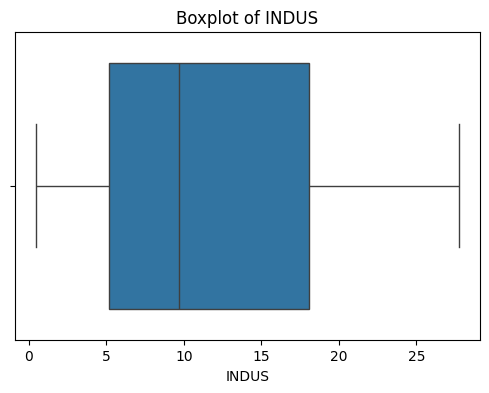

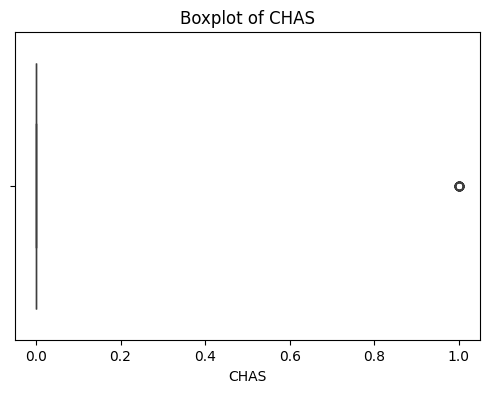

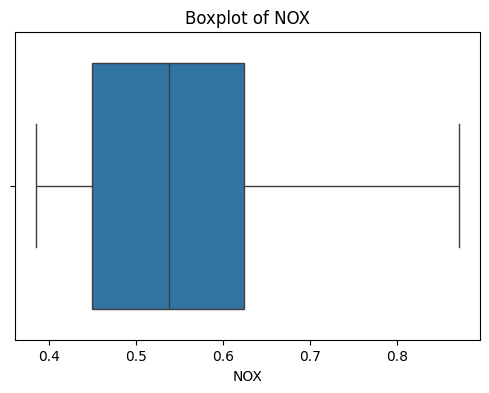

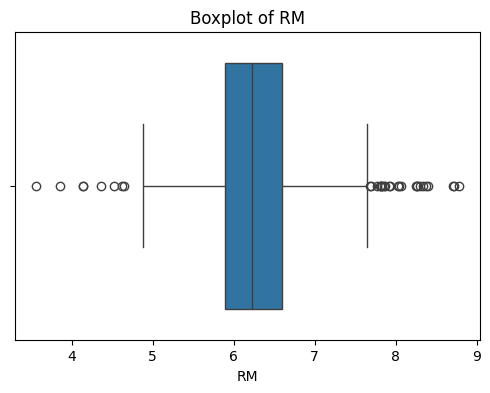

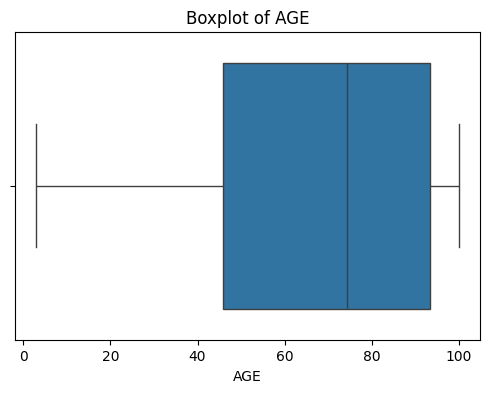

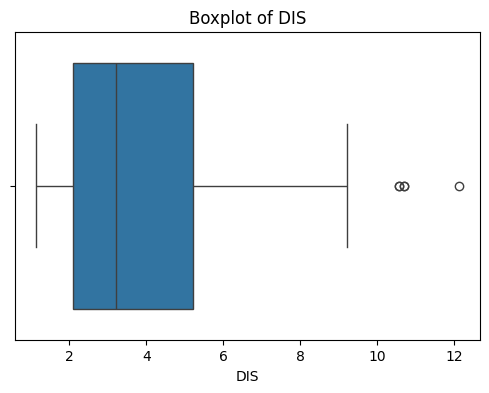

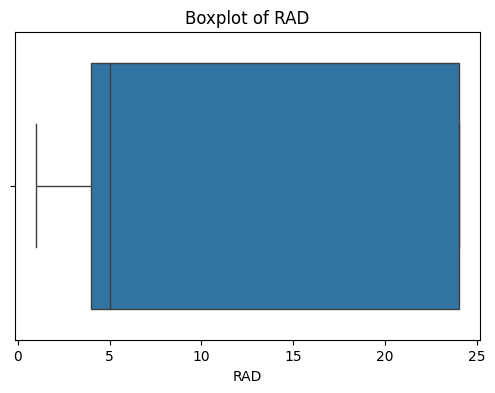

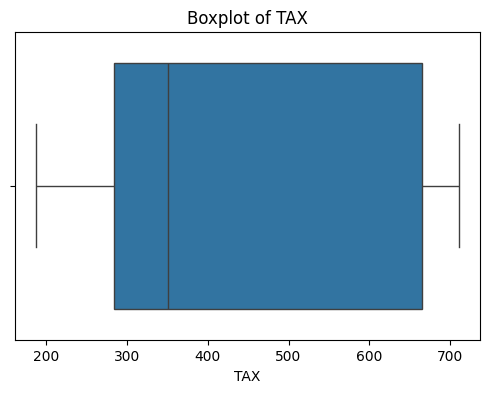

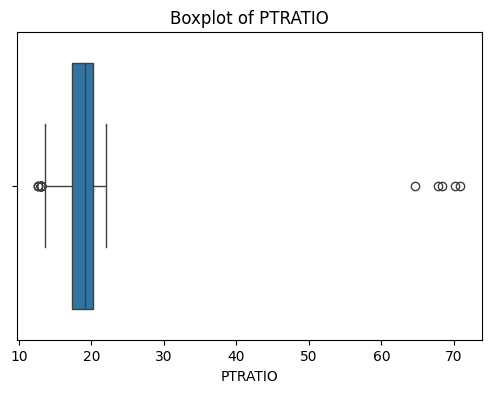

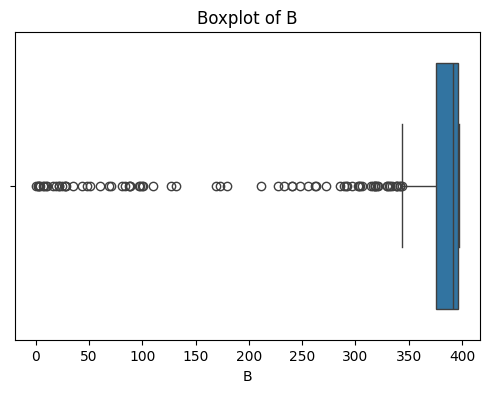

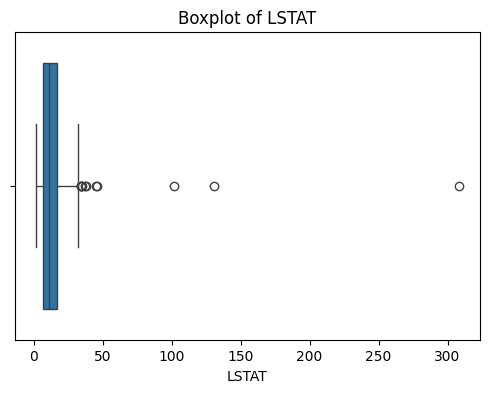

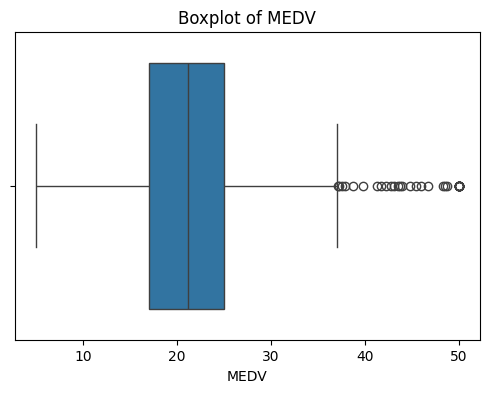

The circles on the boxplots represent outliers, and the small peaks far from the main peaks on the histograms represent outliers
The features that have outliers are CRIM, ZN, RM, DIS, PTRATIO, B, LSTAT, MEDV
Some outliers are close to the main data, while other outliers are extremely far from the main data!


In [8]:
# Your solution goes here


# Read the no missing cleaned housing dataset
df = pd.read_csv('./data/no_missing_cleaned_housing.csv')

# Plot histograms 
df.hist(figsize=(12, 12), bins=20, edgecolor='black')
plt.suptitle('Histograms of Features', fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.96])  # Adjust layout to make room for the suptitle
plt.show()

# Plot boxplots 
for column in df.columns:
    plt.figure(figsize=(6, 4))
    sns.boxplot(x=df[column])
    plt.title(f'Boxplot of {column}')
    plt.show()

print("The circles on the boxplots represent outliers, and the small peaks far from the main peaks on the histograms represent outliers")

print("The features that have outliers are CRIM, ZN, RM, DIS, PTRATIO, B, LSTAT, MEDV")

print("Some outliers are close to the main data, while other outliers are extremely far from the main data!")

## 2.2: Define what could be outliers
In the previous task, you identified potential outliers through visual exploration — several features showed individual data points that lie far from the main distribution.

However, visual inspection alone isn't always enough. In this task, you’ll take a more formal approach by considering statistical methods for defining and detecting outliers. Answer following questions:

1. How can we define an outlier in a way that is measurable?
- A common definition for outlier is IQR, in which an outlier is a value that lies more than 1.5 * IQR above the third quartile (Q3) or below the first quartile (Q1).
- Please give your own definition of an outlier and explain your reasoning.

2. What method(s) can be used to detect outliers in numerical features? Choose one method you find appropriate and use it in your code to detect outliers in at least one numerical feature.


In [9]:
# Your solution goes here

# Question 1: Formally defined, an outlier is a data point that is significantly different from the pattern of the data set. As explained in the question, a common way is greater or less than 1.5 * IQR.
# Another way to define it an outlier is if the data point is 2 or more standard deviations away from the mean/median of the data set. This means it is in the top or bottom 5% of the data.

#Question 2: We can use the 1.5* IQR rule.



# Read the no missing cleaned house dataset
df = pd.read_csv('./data/no_missing_cleaned_housing.csv')

# Step 1: Calculate Q1, Q3, and IQR for the "LSTAT" column
Q1 = df['LSTAT'].quantile(0.25)  # First Quartile (25th percentile)
Q3 = df['LSTAT'].quantile(0.75)  # Third Quartile (75th percentile)
IQR = Q3 - Q1  # Interquartile Range

# Step 2: Define the lower and upper bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Step 3: Identify outliers
outliers = df[(df['LSTAT'] < lower_bound) | (df['LSTAT'] > upper_bound)]

# Display the outliers
print(f"Outliers detected in the LSTAT column:")
print(outliers)



Outliers detected in the LSTAT column:
         CRIM    ZN  INDUS  CHAS    NOX        RM         AGE     DIS  RAD  \
47    0.25387   0.0   6.91     0  0.448  5.399000   95.300000  5.8700    3   
67    0.13554  12.5   6.07     0  0.409  5.594000   36.800000  6.4980    4   
140   1.62864   0.0  21.89     0  0.624  6.288054   68.337292  1.4394    4   
307   0.49298   0.0   9.90     0  0.544  6.635000   82.500000  3.3175    4   
343   0.03049  55.0   3.78     0  0.484  6.874000   28.100000  6.4654    5   
361   3.67822   0.0  18.10     0  0.770  5.362000   96.200000  2.1036   24   
372  11.10810   0.0  18.10     0  0.668  4.906000  100.000000  1.1742   24   
373  18.49820   0.0  18.10     0  0.668  4.138000  100.000000  1.1370   24   
411  18.81100   0.0  18.10     0  0.597  4.628000  100.000000  1.5539   24   
413  45.74610   0.0  18.10     0  0.693  4.519000  100.000000  1.6582   24   
437  13.67810   0.0  18.10     0  0.740  5.935000   87.900000  1.8206   24   

            TAX  PTRATIO

## 2.3: Address outliers

In the previous task, you detected several outliers across different features. Now, it’s time to decide what to do about them.

Outliers aren't always errors — they may represent rare but valid observations, or they may be mistakes or anomalies that distort the analysis. In this task, you’ll define and apply a strategy to handle them based on your understanding of the data.

Explore and answer the following questions:
- Are the outliers data entry errors or real, rare values?
- Should you remove, transform, cap, or flag them?
- How might your decision affect your model?


In [10]:
# Your solution goes here
# The outliers seem to be real, rare values. This is because even though the outliers exist, they do not seem to exist out of the realm of possibility.
# A perfect example of this is a RM upperbound outlier. Billionare neighborhoods have ridiculous numbers of rooms per dwellings in comparison to the average neighborhood. 
# We are choosing to treat the outliers as valid numbers but cap those in the top + bottom 5% of our data to avoid our data being heavily skewed by those numbers.



# Load the no missing cleaned housing dataset
df = pd.read_csv('./data/no_missing_cleaned_housing.csv')

# Create a copy to preserve the original
df_capped = df.copy()

# Loop through all numeric columns
numeric_cols = df_capped.select_dtypes(include='number').columns

for col in numeric_cols:
    # Calculate the 5th and 95th percentiles
    lower_cap = df_capped[col].quantile(0.05)
    upper_cap = df_capped[col].quantile(0.95)

    # Cap the values
    df_capped[col] = df_capped[col].apply(
        lambda x: lower_cap if x < lower_cap else (upper_cap if x > upper_cap else x)
    )

# Save the capped DataFrame to a new CSV file
df_capped.to_csv('./data/capped_housing.csv', index=False)

print("Capping complete. Saved to './data/capped_housing.csv'")



Capping complete. Saved to './data/capped_housing.csv'


# Task 3: Visualize how features are related

Let’s explore how different features (columns) relate to each other, especially to housing prices.


*   Look at the column descriptions. Which features do you think are most closely related to housing prices? Explain your reasoning in a few sentences.
*   Choose a way to visualize the correlation between all the features. Which features have a strong correlation with housing price?
Did this match what you expected?
*   Besides the housing price, are there any other features that are strongly correlated with each other? If yes, do you think you need both of them in your model? Or could you keep just one, or combine them? Use the column descriptions to support your answer.




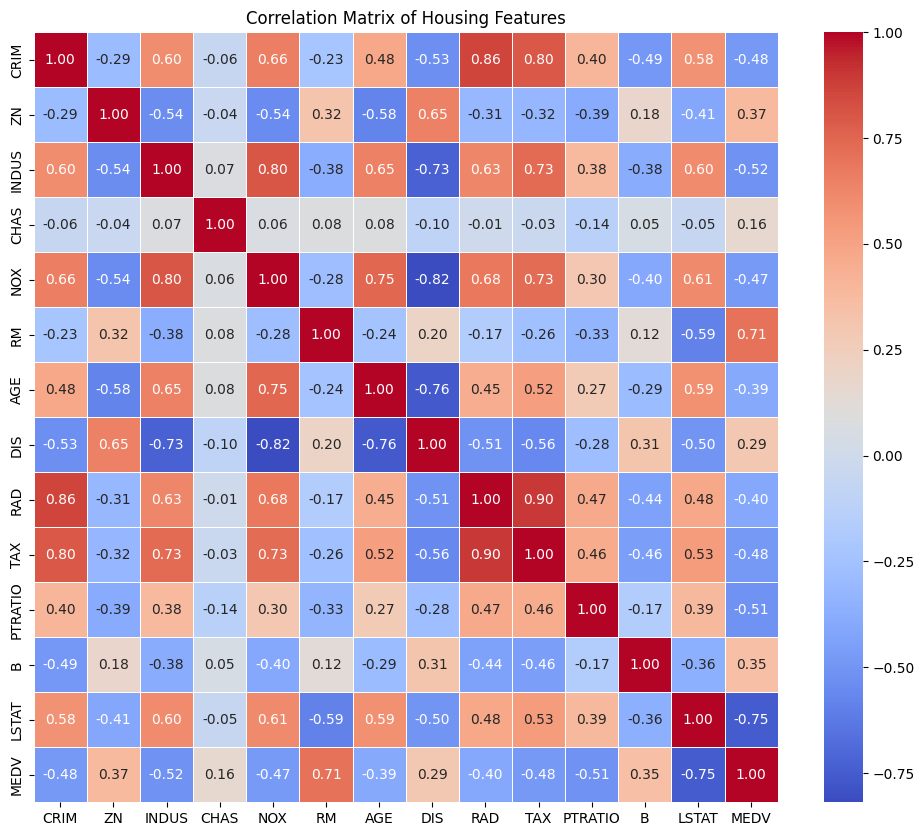

In [11]:
# Your solution goes here

# Question 1: The features I would imagine are most closely related to housing prices are CRIM, TAX, and DIS. CRIM is important as people want to live in safe neighborhoods.
# TAX is important is the lower the property tax, the more desireable the location is.
# DIS is important, as being close to your job is extremely important. This is especially the case in a traffic dense city like Boston.

# Question 2: Visualizing the correlation



# Load the capped housing dataset
df = pd.read_csv('./data/capped_housing.csv')  

# Compute the correlation matrix
corr = df.corr(numeric_only=True)

# Plot the heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix of Housing Features")
plt.show()

#The features most closely related are RM, B, and ZN. This did not match my expectations!

# Question 3: Some other strongly correlated features are CRIM + RAD, TAX + RAD, and NOX + INDUS. Lets analysis if we need to keep both for all 3 relationships.

# CRIM + RAD: While the correlation is high (yet still <.9), these are two very different statistics that we learn a lot from. We should keep both!

# TAX + RAD: With a correlation of .9, it is clear that a high index of accessibility to radial highways implies a high property tax rate. 
# Since this is essentially the only takeaway we get from RAD, we can get rid of this feature!


# NOX + INDUS: While the correlation is high (yet still <.9), these are two very different statistics that we learn a lot from. We should keep both!